These Algorithms work best for:

rings

spirals

varying-density clusters

(where K-Means fails)

# DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

It groups ‘densely grouped’ data points into a single cluster. It can identify clusters in large spatial datasets by looking at the local density of the data points. The most exciting feature of DBSCAN clustering is that it is robust to outliers. Unlike K-Means, where we have to specify the number of centroids, it also does not require the number of clusters to be told beforehand.

The DBSCAN algorithm requires only two parameters: **epsilon** and **minPoints**. Epsilon is the radius of the circle to be created around each data point to check its density, and minPoints is the minimum number of data points required inside that circle for that data point to be classified as a Core point.

In higher dimensions, the circle becomes a hypersphere, epsilon becomes its radius, and minPoints is the minimum number of data points required inside it.

DBSCAN algorithm creates a circle of epsilon radius around every data point and classifies them into **Core point, Border point, and Noise**.

A data point is a Core point if the circle around it contains at least ‘minPoints’ number of points.

 If the number of points is less than minPoints, then it is classified as Border Point.

 If there are no other data points around any data point within epsilon radius, then it treated as Noise.

 below example minPoints = 3 at some epsilon

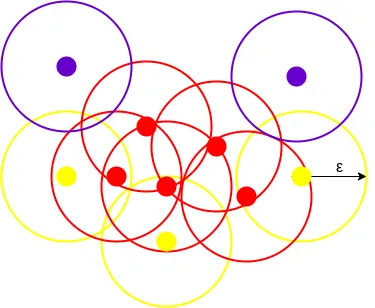

 It also needs to scan through the entire dataset once, whereas other algorithms require multiple scans.

 Also, minPoints>=Dimensions+1

 The value of epsilon can be decided from the K-distance graph. The point of maximum curvature (elbow) in this graph tells us about the value of epsilon. If the value of epsilon chosen is too small, then more clusters will be created, and more data points will be taken as noise. However, if chosen too big, various small clusters will merge into a big cluster, and we will lose details.



https://medium.com/@abhaysingh71711/dbscan-explained-unleashing-the-power-of-density-based-clustering-72a51ba40fdf

In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

np.random.seed(42)

In [2]:
# Function for creating datapoints in the form of a circle
def PointsInCircum(r,n=100):
    return [(math.cos(2*math.pi/n*x)*r+np.random.normal(-30,30),math.sin(2*math.pi/n*x)*r+np.random.normal(-30,30)) for x in range(1,n+1)]

# Creating data points in the form of a circle
df=pd.DataFrame(PointsInCircum(500,1000))
df = pd.concat([df, pd.DataFrame(PointsInCircum(300,700))], ignore_index=True)
df = pd.concat([df, pd.DataFrame(PointsInCircum(100,300))], ignore_index=True)
# Adding noise to the dataset
df = pd.concat([df,pd.DataFrame([(np.random.randint(-600,600),np.random.randint(-600,600)) for i in range(300)])], ignore_index  = True)

In [3]:
df

,0,1
0,484.891555,-31.006357
1,489.391178,21.973916
2,462.886575,-27.599889
3,517.218479,5.588090
4,455.669049,1.982181
...,...,...
2295,-229.000000,-504.000000
2296,392.000000,-580.000000
2297,134.000000,525.000000
2298,469.000000,-535.000000


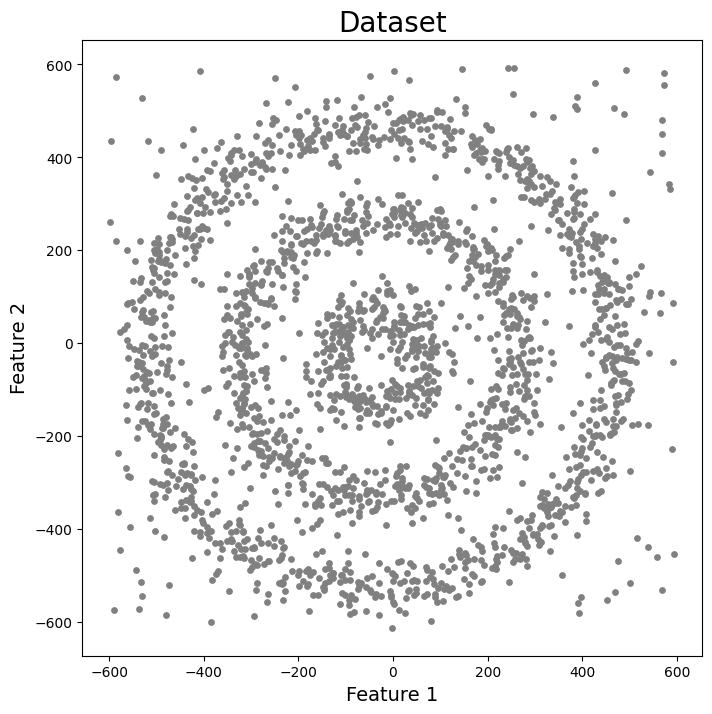

In [4]:
plt.figure(figsize=(8,8))
plt.scatter(df[0],df[1],s=15,color='grey')
plt.title('Dataset',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()

## K-means

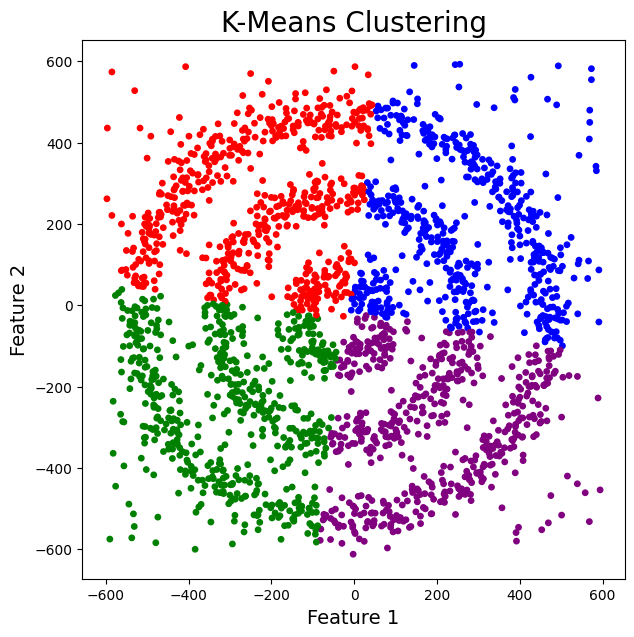

In [5]:
import matplotlib.pyplot as plt
import matplotlib
from sklearn.cluster import KMeans

k_means = KMeans(n_clusters=4, random_state=42)
k_means.fit(df[[0,1]])

df['KMeans_labels'] = k_means.labels_

colors = ['purple', 'red', 'blue', 'green']

plt.figure(figsize=(7,7))
plt.scatter(df[0], df[1],
            c=df['KMeans_labels'],
            cmap=matplotlib.colors.ListedColormap(colors),
            s=15)

plt.title('K-Means Clustering', fontsize=20)
plt.xlabel('Feature 1', fontsize=14)
plt.ylabel('Feature 2', fontsize=14)
plt.show()


In [6]:
df

,0,1,KMeans_labels
0,484.891555,-31.006357,2
1,489.391178,21.973916,2
2,462.886575,-27.599889,2
3,517.218479,5.588090,2
4,455.669049,1.982181,2
...,...,...,...
2295,-229.000000,-504.000000,3
2296,392.000000,-580.000000,0
2297,134.000000,525.000000,2
2298,469.000000,-535.000000,0


## Hierarchial clustering

In [7]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(
    n_clusters=4,
    metric='euclidean',
    linkage='ward'
)

model.fit(df[[0,1]])
model.fit(df[[0,1]])
df['HR_labels']=model.labels_

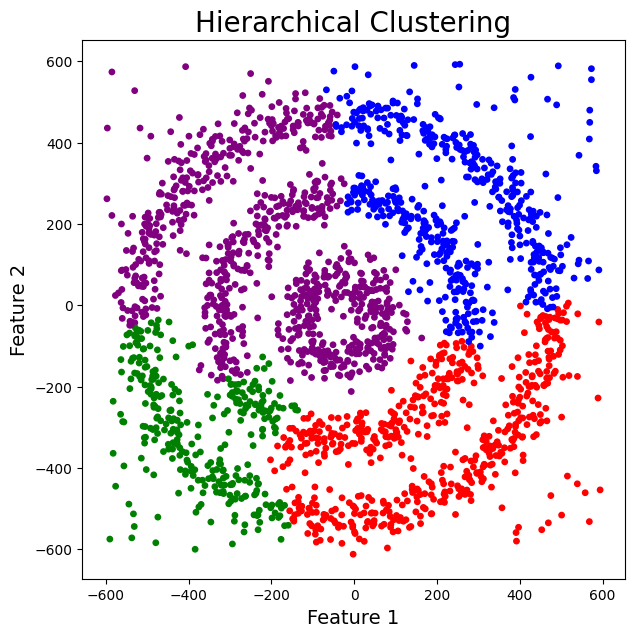

In [8]:
plt.figure(figsize=(7,7))
plt.scatter(df[0],df[1],c=df['HR_labels'],cmap=matplotlib.colors.ListedColormap(colors),s=15)
plt.title('Hierarchical Clustering',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()

In [9]:
df

,0,1,KMeans_labels,HR_labels
0,484.891555,-31.006357,2,1
1,489.391178,21.973916,2,2
2,462.886575,-27.599889,2,1
3,517.218479,5.588090,2,1
4,455.669049,1.982181,2,2
...,...,...,...,...
2295,-229.000000,-504.000000,3,3
2296,392.000000,-580.000000,0,1
2297,134.000000,525.000000,2,2
2298,469.000000,-535.000000,0,1


## DBSCAN

In [10]:
from sklearn.cluster import DBSCAN
dbscan=DBSCAN(eps = 0.5, min_samples = 5)
dbscan.fit(df[[0,1]])
df['DBSCAN_labels']=dbscan.labels_

In [11]:
df

,0,1,KMeans_labels,HR_labels,DBSCAN_labels
0,484.891555,-31.006357,2,1,-1
1,489.391178,21.973916,2,2,-1
2,462.886575,-27.599889,2,1,-1
3,517.218479,5.588090,2,1,-1
4,455.669049,1.982181,2,2,-1
...,...,...,...,...,...
2295,-229.000000,-504.000000,3,3,-1
2296,392.000000,-580.000000,0,1,-1
2297,134.000000,525.000000,2,2,-1
2298,469.000000,-535.000000,0,1,-1


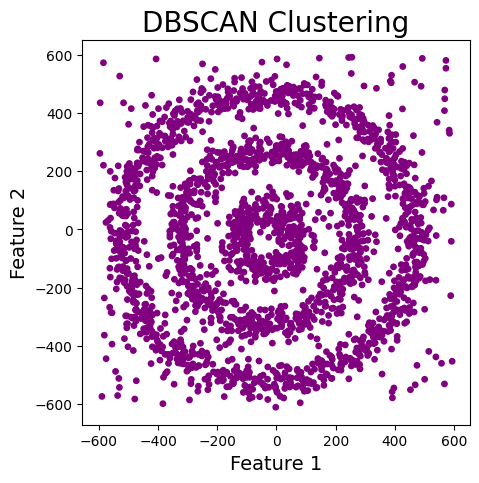

In [12]:
plt.figure(figsize=(5,5))
plt.scatter(df[0],df[1],c=df['DBSCAN_labels'],cmap=matplotlib.colors.ListedColormap(colors),s=15)
plt.title('DBSCAN Clustering',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()

To plot a K-distance Graph, we need the distance between a point and its nearest data point for all data points in the dataset. We obtain this using NearestNeighbors from sklearn.neighbors.

In [13]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(df[[0,1]])
distances, indices = nbrs.kneighbors(df[[0,1]])

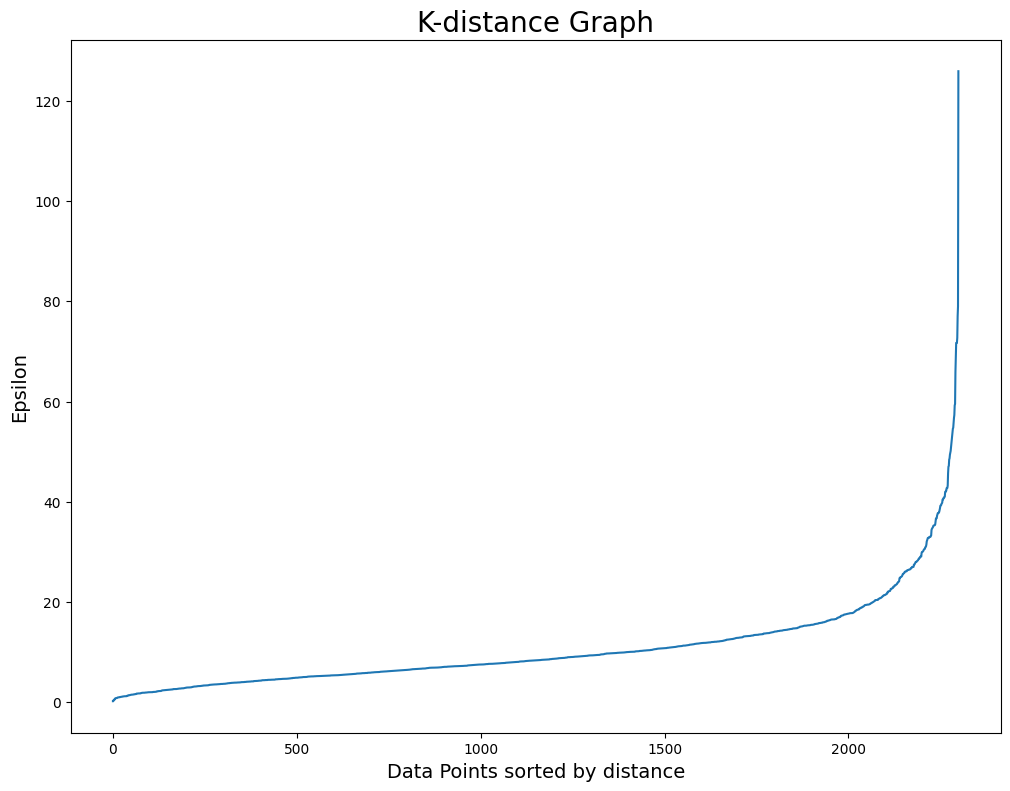

In [14]:
# Plotting K-distance Graph
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(12,9))
plt.plot(distances)
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

In [15]:
from sklearn.cluster import DBSCAN
dbscan_opt=DBSCAN(eps=30,min_samples=6)
dbscan_opt.fit(df[[0,1]])
df['DBSCAN_opt_labels']=dbscan_opt.labels_
df['DBSCAN_opt_labels'].value_counts()

,count
DBSCAN_opt_labels,
0,1030
1,730
2,318
-1,222


In [16]:
df

,0,1,KMeans_labels,HR_labels,DBSCAN_labels,DBSCAN_opt_labels
0,484.891555,-31.006357,2,1,-1,0
1,489.391178,21.973916,2,2,-1,0
2,462.886575,-27.599889,2,1,-1,0
3,517.218479,5.588090,2,1,-1,0
4,455.669049,1.982181,2,2,-1,0
...,...,...,...,...,...,...
2295,-229.000000,-504.000000,3,3,-1,0
2296,392.000000,-580.000000,0,1,-1,-1
2297,134.000000,525.000000,2,2,-1,-1
2298,469.000000,-535.000000,0,1,-1,-1


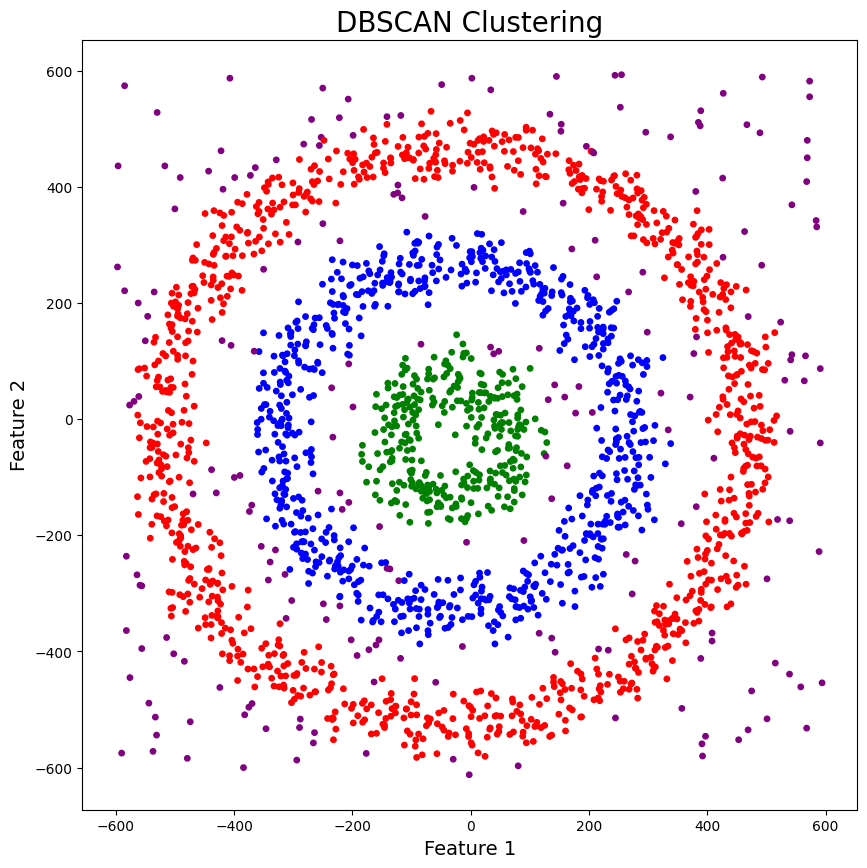

In [17]:
# Plotting the resulting clusters
plt.figure(figsize=(10,10))
plt.scatter(df[0],df[1],c=df['DBSCAN_opt_labels'],cmap=matplotlib.colors.ListedColormap(colors),s=15)
plt.title('DBSCAN Clustering',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()

# OPTICS (Ordering Points To Identify the Clustering Structure)

Unlike DBSCAN which struggles with varying densities. OPTICS does not directly assign clusters but instead creates a reachability plot which visually represents clusters.

**Core Distance**: The minimum distance needed for a point to be classified as a core point. If a point does not have enough nearby neighbours, its core distance is undefined.

**Reachability Distance**: It is a measure of how difficult it is to reach from one point to another. It is calculated as the larger core distance of the starting point and the actual point.

The algorithm selects a starting point and checks if it has at least MinPts neighbors within Eps.

If the point meets the density requirement it is marked as a core point and nearby points are then analyzed.

Reachability distance is computed for each neighboring point.

Points are then processed in order of their reachability distance hence forming a reachability plot.

Clusters appear as valleys i.e low reachability distances and noise appears as peaks i.e high reachability distances

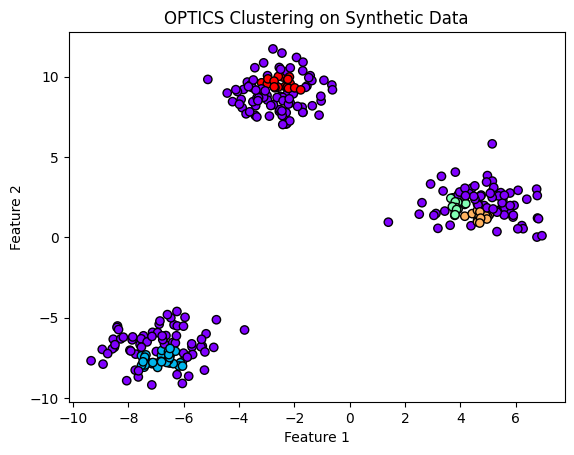

In [18]:
from sklearn.cluster import OPTICS
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt

X, _ = make_blobs(n_samples=300, centers=3, random_state=42)

clustering = OPTICS(min_samples=5, xi=0.05, min_cluster_size=0.05)
clustering.fit(X)

labels = clustering.labels_

plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='rainbow', edgecolor='k')
plt.title("OPTICS Clustering on Synthetic Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

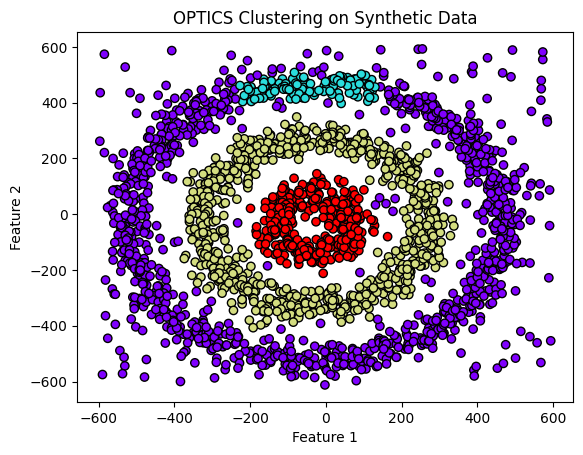

In [30]:
clustering = OPTICS(min_samples=5, xi=0.044, min_cluster_size=0.05) # xi = 0.05 means cluster is detected when reachability distance increases by 5% & min_cluster_size = min number of points in a cluster / total points
clustering.fit(df[[0,1]])

labels2 = clustering.labels_

plt.scatter(df[0], df[1], c=labels2, cmap='rainbow', edgecolor='k')
plt.title("OPTICS Clustering on Synthetic Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


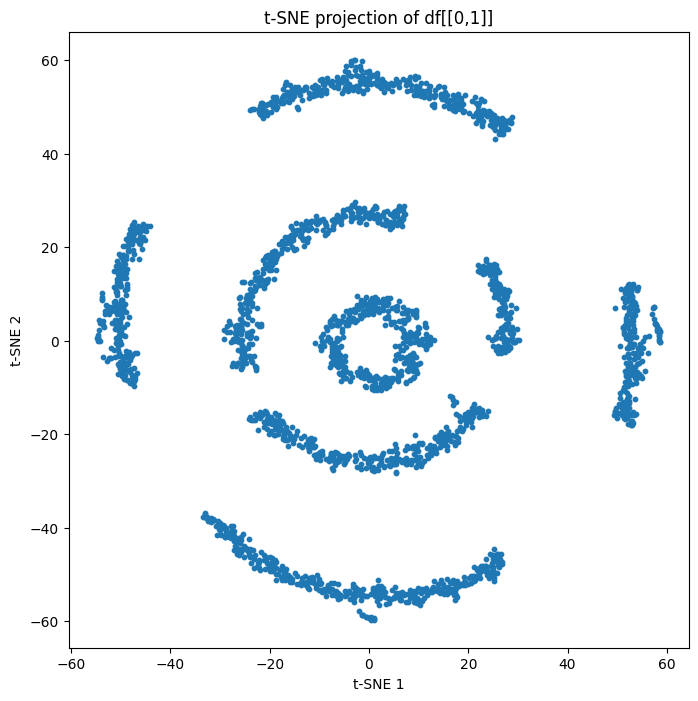

In [20]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Feature matrix
X = df[[0,1]].values

# t-SNE
tsne = TSNE(
    n_components=2,
    perplexity=40,
    learning_rate=200,
    n_iter=2000,
    random_state=42
)

X_tsne = tsne.fit_transform(X)

# Plot
plt.figure(figsize=(8,8))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], s=10)
plt.title("t-SNE projection of df[[0,1]]")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.show()
